In [ ]:
#Chris Hasty HW11 Program A: House Prices. 

In [ ]:
#The following code was contributed by josephlee94: https://github.com/josephlee94/intuitive-deep-learning

In [1]:
import pandas as pd

In [7]:
df = pd.read_csv("C:/Users/Chris/Desktop/housepricedata.csv")

In [8]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [9]:
dataset = df.values

In [10]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [11]:
X = dataset[:,0:10]
Y = dataset[:,10]

In [12]:
from sklearn import preprocessing

In [13]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [14]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [17]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)


In [18]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)


(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [19]:
from keras.models import Sequential
from keras.layers import Dense

In [20]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [21]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [22]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 0s 12ms/step - loss: 0.7005 - accuracy: 0.4922 - val_loss: 0.6959 - val_accuracy: 0.4749
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.5127 - val_loss: 0.6884 - val_accuracy: 0.6301
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6855 - accuracy: 0.6546 - val_loss: 0.6825 - val_accuracy: 0.6804
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6803 - accuracy: 0.6301 - val_loss: 0.6775 - val_accuracy: 0.6256
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6756 - accuracy: 0.6233 - val_loss: 0.6728 - val_accuracy: 0.6210
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6712 - accuracy: 0.6223 - val_loss: 0.6685 - val_accuracy: 0.6301
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6669 - accuracy: 0.6605 - val_loss: 0.6641 - val_accuracy: 0.6301
Epoch 8/100


In [23]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.2724 - accuracy: 0.8950


0.8949771523475647

In [24]:
import matplotlib.pyplot as plt

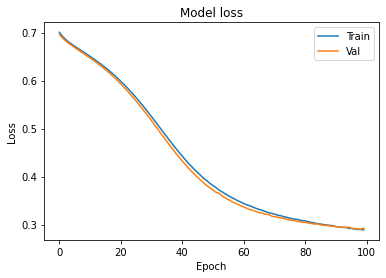

In [25]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


In [26]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


KeyError: 'acc'

In [27]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 48ms/step - loss: 0.4628 - accuracy: 0.7789 - val_loss: 0.3858 - val_accuracy: 0.8356
Epoch 2/100
32/32 [==============================] - 1s 34ms/step - loss: 0.3385 - accuracy: 0.8601 - val_loss: 0.3392 - val_accuracy: 0.8584
Epoch 3/100
32/32 [==============================] - 1s 35ms/step - loss: 0.3061 - accuracy: 0.8738 - val_loss: 0.3514 - val_accuracy: 0.8539
Epoch 4/100
32/32 [==============================] - 1s 36ms/step - loss: 0.2701 - accuracy: 0.8826 - val_loss: 0.3308 - val_accuracy: 0.8630
Epoch 5/100
32/32 [==============================] - 1s 36ms/step - loss: 0.2717 - accuracy: 0.8836 - val_loss: 0.3376 - val_accuracy: 0.8721
Epoch 6/100
32/32 [==============================] - 1s 37ms/step - loss: 0.2425 - accuracy: 0.8904 - val_loss: 0.3726 - val_accuracy: 0.8813
Epoch 7/100
32/32 [==============================] - 1s 42ms/step - loss: 0.2569 - accuracy: 0.8924 - val_loss: 0.3140 - val_accuracy: 0.8767
Epoch 

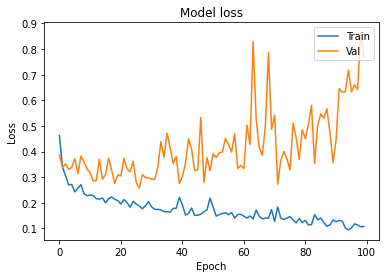

In [28]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


In [29]:
plt.plot(hist_2.history['acc'])
plt.plot(hist_2.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

KeyError: 'acc'

In [30]:
from keras.layers import Dropout
from keras import regularizers

In [31]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [32]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 60ms/step - loss: 14.2659 - accuracy: 0.6096 - val_loss: 3.9234 - val_accuracy: 0.8265
Epoch 2/100
32/32 [==============================] - 2s 49ms/step - loss: 1.6919 - accuracy: 0.8170 - val_loss: 0.6470 - val_accuracy: 0.8584
Epoch 3/100
32/32 [==============================] - 2s 52ms/step - loss: 0.5480 - accuracy: 0.8699 - val_loss: 0.4857 - val_accuracy: 0.8630
Epoch 4/100
32/32 [==============================] - 2s 57ms/step - loss: 0.5244 - accuracy: 0.8591 - val_loss: 0.4673 - val_accuracy: 0.8721
Epoch 5/100
32/32 [==============================] - 2s 50ms/step - loss: 0.4762 - accuracy: 0.8826 - val_loss: 0.4597 - val_accuracy: 0.8630
Epoch 6/100
32/32 [==============================] - 2s 55ms/step - loss: 0.4837 - accuracy: 0.8728 - val_loss: 0.4705 - val_accuracy: 0.8630
Epoch 7/100
32/32 [==============================] - 2s 54ms/step - loss: 0.4912 - accuracy: 0.8689 - val_loss: 0.4714 - val_accuracy: 0.8813
Epoch

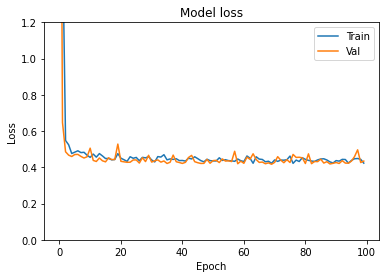

In [33]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

In [34]:
plt.plot(hist_3.history['acc'])
plt.plot(hist_3.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

KeyError: 'acc'